<a href="https://colab.research.google.com/github/joykiriba/Cryptocurrency-Price-Prediction/blob/main/Cryptocurrency_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Defining the question

### a.) Specifying data analytic question

 Using the trading time series of a cryptocurrency’s price, in addition to a set of qualitative features (news, social impact, Twitter, Reddit, social media sentiment analysis), we would like to build a model that forecasts a cryptocurrency’s price. In this challenge, we are focusing on the trading time series and how we can optimize currency forecasting. We will predict future cryptocurrency prices.



### b.) Defining metric for success

### c.)Understanding the context

After the boom and bust of cryptocurrencies’ prices in recent years, cryptocurrencies have been increasingly regarded as an investment asset. Because of their highly volatile nature, there is a need for good predictions on which to base investment decisions. Different existing studies have leveraged machine learning for more accurate cryptocurrency price prediction. We are interested in applying different modeling techniques to samples with different data structures (qualitative and quantitative data) and dimensional features to achieve an optimization in price prediction.

**NB:** The target value is the actual price. We have data extracted in an interval of 1h for a period of one year (from 1st of March 2020 to 1st of March 2021). We are interested in predicting the values of cryptocurrency prices in specific timestamps that we have in the validation file.

### d.) Recording experimental design

### e.) Data Relevance

## Reading the data

### Importing relevant libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from yellowbrick.model_selection import validation_curve
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


### Loading datasets

In [ ]:
df = pd.read_csv('Train.csv')

In [ ]:
test = pd.read_csv('Test.csv')

## Checking the data

### Previewing the top of our dataset

In [ ]:
df.head()

,id,asset_id,open,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,reddit_posts_score,reddit_comments,reddit_comments_score,tweets,tweet_spam,tweet_followers,tweet_quotes,tweet_retweets,tweet_replies,tweet_favorites,tweet_sentiment1,tweet_sentiment2,tweet_sentiment3,tweet_sentiment4,tweet_sentiment5,tweet_sentiment_impact1,tweet_sentiment_impact2,tweet_sentiment_impact3,tweet_sentiment_impact4,tweet_sentiment_impact5,social_score,average_sentiment,news,price_score,social_impact_score,correlation_rank,galaxy_score,volatility,market_cap_rank,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,medium,youtube,social_volume,percent_change_24h,market_cap_global,close
0,ID_322qz6,1,9422.849081,9428.490628,9422.849081,7.131986e+08,1.737635e+11,1689.0,817.0,55.0,105.0,61.0,271.0,3420.0,1671.0,11675867.0,39.0,1343.0,448.0,2237.0,124.0,330.0,331.0,2515.0,120.0,506133.0,1326610.0,1159677.0,8406185.0,281329.0,11681999.0,3.6,69.0,2.7,3.6,3.3,66.0,0.007118,1.0,606.0,2.0,1.0,1.0,2.0,5.0,4422,1.434516,2.818066e+11,9428.279323
1,ID_3239o9,1,7985.359278,7992.059917,7967.567267,4.004755e+08,1.426942e+11,920.0,544.0,20.0,531.0,103.0,533.0,1491.0,242.0,5917814.0,195.0,1070.0,671.0,3888.0,1.0,52.0,315.0,1100.0,23.0,1320.0,381117.0,1706376.0,3754815.0,80010.0,5924770.0,3.7,1.0,2.0,2.0,1.0,43.5,0.009419,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2159,-2.459507,2.126897e+11,7967.567267
2,ID_323J9k,1,49202.033780,49394.593520,49068.057050,3.017729e+09,9.166977e+11,1446.0,975.0,72.0,1152.0,187.0,905.0,9346.0,4013.0,47778746.0,104.0,2014.0,1099.0,11476.0,331.0,923.0,864.0,6786.0,442.0,9848462.0,5178557.0,2145663.0,25510267.0,5110490.0,47796942.0,3.7,22.0,3.1,3.0,3.3,65.5,0.013530,1.0,692.0,3.0,1.0,1.0,NaN,NaN,10602,4.942448,1.530712e+12,49120.738480
3,ID_323y5P,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,424.0,268.0,443.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,285,NaN,NaN,NaN
4,ID_324kJH,1,10535.737120,10535.737120,10384.798220,1.150053e+09,1.921183e+11,1012.0,638.0,24.0,42.0,50.0,173.0,3262.0,1652.0,14422172.0,21.0,511.0,190.0,2284.0,86.0,280.0,443.0,2284.0,169.0,311017.0,1977833.0,731277.0,10964321.0,440730.0,14426405.0,3.7,22.0,4.7,3.8,4.4,83.0,0.010332,1.0,749.0,2.0,1.0,1.0,NaN,2.0,3996,2.609576,3.386925e+11,10384.798220


In [ ]:
test.head()

,id,asset_id,open,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,reddit_posts_score,reddit_comments,reddit_comments_score,tweets,tweet_spam,tweet_followers,tweet_quotes,tweet_retweets,tweet_replies,tweet_favorites,tweet_sentiment1,tweet_sentiment2,tweet_sentiment3,tweet_sentiment4,tweet_sentiment5,tweet_sentiment_impact1,tweet_sentiment_impact2,tweet_sentiment_impact3,tweet_sentiment_impact4,tweet_sentiment_impact5,social_score,average_sentiment,news,price_score,social_impact_score,correlation_rank,galaxy_score,volatility,market_cap_rank,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,medium,youtube,social_volume,percent_change_24h,market_cap_global
0,ID_323Sn2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,56.0,2.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN
1,ID_325SNW,1,11335.062190,11351.690960,11335.062190,1.064152e+09,2.101463e+11,1664.0,1045.0,64.0,213.0,51.0,274.0,6046.0,3034.0,23453171.0,119.0,2305.0,1367.0,6252.0,151.0,565.0,603.0,4553.0,174.0,2900568.0,1898920.0,2268741.0,14056214.0,2338771.0,23465365.0,3.7,39.0,3.2,3.4,2.8,65.5,0.004407,1.0,711.0,2.0,1.0,1.0,1.0,1.0,7245,-0.555698,3.631052e+11
2,ID_325uzE,1,6322.560756,6328.362354,6294.714484,1.516268e+09,1.153862e+11,397.0,255.0,11.0,72.0,30.0,112.0,2404.0,304.0,3831278.0,12.0,346.0,73.0,604.0,39.0,103.0,668.0,1406.0,188.0,29147.0,411178.0,873284.0,2389256.0,129448.0,3832828.0,3.7,2.0,3.0,3.0,3.4,65.5,0.024035,1.0,715.0,2.0,1.0,1.0,NaN,NaN,2702,1.689370,1.771075e+11
3,ID_328qCx,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,96.0,217.0,244.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225,NaN,NaN
4,ID_3293uJ,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,49.0,33.0,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59,NaN,NaN


### previewing the bottom of our dataset

In [ ]:
df.tail()

,id,asset_id,open,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,reddit_posts_score,reddit_comments,reddit_comments_score,tweets,tweet_spam,tweet_followers,tweet_quotes,tweet_retweets,tweet_replies,tweet_favorites,tweet_sentiment1,tweet_sentiment2,tweet_sentiment3,tweet_sentiment4,tweet_sentiment5,tweet_sentiment_impact1,tweet_sentiment_impact2,tweet_sentiment_impact3,tweet_sentiment_impact4,tweet_sentiment_impact5,social_score,average_sentiment,news,price_score,social_impact_score,correlation_rank,galaxy_score,volatility,market_cap_rank,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,medium,youtube,social_volume,percent_change_24h,market_cap_global,close
12627,ID_zybd4H,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,61.0,138.0,161.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN
12628,ID_zydeys,1,7294.506136,7306.701928,7292.729876,3.816704e+08,1.322473e+11,605.0,462.0,16.0,217.0,39.0,156.0,1501.0,241.0,10909376.0,9.0,170.0,44.0,292.0,35.0,51.0,358.0,973.0,84.0,163376.0,304833.0,775658.0,9213680.0,452344.0,10910586.0,3.7,2.0,3.3,3.0,2.6,63.0,0.019912,1.0,1007.0,2.0,1.0,1.0,NaN,NaN,2020,NaN,1.978198e+11,7303.640282
12629,ID_zyfj4W,1,8811.121632,8832.560173,8754.602574,2.412260e+09,1.621298e+11,1653.0,757.0,74.0,249.0,60.0,107.0,4852.0,513.0,14878543.0,92.0,1127.0,454.0,3252.0,144.0,203.0,952.0,3101.0,452.0,617875.0,656816.0,2617007.0,10307241.0,684529.0,14885477.0,3.7,44.0,2.8,3.0,3.9,67.0,0.020715,1.0,918.0,2.0,1.0,1.0,1.0,2.0,5787,NaN,2.493421e+11,8828.440234
12630,ID_zz5eGB,1,9661.514681,9662.196605,9645.133934,9.861517e+08,1.774933e+11,1376.0,657.0,39.0,81.0,43.0,122.0,3915.0,675.0,14439095.0,153.0,871.0,274.0,3343.0,74.0,188.0,671.0,2691.0,291.0,278732.0,360131.0,1733775.0,10881941.0,1189157.0,14445315.0,3.8,25.0,3.0,4.4,4.5,78.5,0.012411,1.0,603.0,2.0,1.0,1.0,NaN,9.0,4679,2.706432,2.757547e+11,9658.204385
12631,ID_zzwUuL,1,11846.368560,11846.368560,11795.042560,3.914378e+09,2.182397e+11,969.0,600.0,36.0,136.0,45.0,164.0,2802.0,1335.0,11682657.0,34.0,503.0,298.0,2056.0,81.0,340.0,260.0,2019.0,102.0,358043.0,1636000.0,1076579.0,8431676.0,183250.0,11686817.0,3.6,40.0,2.5,3.7,2.9,63.5,0.013254,1.0,780.0,1.0,1.0,1.0,1.0,1.0,3523,-1.575454,3.836728e+11,11795.042560


In [ ]:
test.tail()

,id,asset_id,open,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,reddit_posts_score,reddit_comments,reddit_comments_score,tweets,tweet_spam,tweet_followers,tweet_quotes,tweet_retweets,tweet_replies,tweet_favorites,tweet_sentiment1,tweet_sentiment2,tweet_sentiment3,tweet_sentiment4,tweet_sentiment5,tweet_sentiment_impact1,tweet_sentiment_impact2,tweet_sentiment_impact3,tweet_sentiment_impact4,tweet_sentiment_impact5,social_score,average_sentiment,news,price_score,social_impact_score,correlation_rank,galaxy_score,volatility,market_cap_rank,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,medium,youtube,social_volume,percent_change_24h,market_cap_global
6217,ID_zufSPk,1,8266.942912,8266.942912,8259.796103,310063715.0,1.491229e+11,618.0,438.0,15.0,202.0,42.0,164.0,996.0,262.0,3310472.0,19.0,217.0,135.0,715.0,2.0,25.0,273.0,671.0,25.0,987.0,187128.0,1174018.0,1933268.0,16157.0,3318645.0,3.7,3.0,2.4,2.3,3.9,61.5,0.007076,1.0,921.0,2.0,1.0,1.0,NaN,NaN,1494,-0.967973,2.262125e+11
6218,ID_zuz9yf,1,10869.612770,10873.493490,10865.827630,698936037.0,2.011601e+11,1608.0,911.0,84.0,204.0,45.0,123.0,5994.0,3808.0,30985192.0,219.0,3020.0,1416.0,7673.0,196.0,502.0,605.0,4484.0,207.0,14614866.0,1739950.0,2052440.0,12246575.0,343689.0,30999455.0,3.7,31.0,2.9,3.9,3.0,67.5,0.005486,1.0,807.0,2.0,1.0,1.0,NaN,6.0,7065,NaN,3.523272e+11
6219,ID_zvrMSX,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,139.0,167.0,317.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,175,NaN,NaN
6220,ID_zy9Cfv,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,85.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN,NaN
6221,ID_zyAFd7,1,7058.172796,7078.973345,7052.332304,473093253.0,1.275507e+11,954.0,672.0,20.0,110.0,65.0,2459.0,2708.0,291.0,10140687.0,15.0,399.0,121.0,838.0,97.0,243.0,502.0,1689.0,177.0,237801.0,1389120.0,1272925.0,6398945.0,843269.0,10143186.0,3.6,4.0,3.1,3.0,2.8,62.5,0.012064,1.0,858.0,2.0,1.0,1.0,NaN,NaN,3469,-3.289226,1.926557e+11


### Dataset information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12632 entries, 0 to 12631
Data columns (total 49 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       12632 non-null  object 
 1   asset_id                 12632 non-null  int64  
 2   open                     8617 non-null   float64
 3   high                     8617 non-null   float64
 4   low                      8617 non-null   float64
 5   volume                   8605 non-null   float64
 6   market_cap               8379 non-null   float64
 7   url_shares               8575 non-null   float64
 8   unique_url_shares        8575 non-null   float64
 9   reddit_posts             12391 non-null  float64
 10  reddit_posts_score       12391 non-null  float64
 11  reddit_comments          12402 non-null  float64
 12  reddit_comments_score    12402 non-null  float64
 13  tweets                   8584 non-null   float64
 14  tweet_spam            

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6222 entries, 0 to 6221
Data columns (total 48 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       6222 non-null   object 
 1   asset_id                 6222 non-null   int64  
 2   open                     4304 non-null   float64
 3   high                     4304 non-null   float64
 4   low                      4304 non-null   float64
 5   volume                   4302 non-null   float64
 6   market_cap               4191 non-null   float64
 7   url_shares               4285 non-null   float64
 8   unique_url_shares        4285 non-null   float64
 9   reddit_posts             6122 non-null   float64
 10  reddit_posts_score       6122 non-null   float64
 11  reddit_comments          6109 non-null   float64
 12  reddit_comments_score    6109 non-null   float64
 13  tweets                   4289 non-null   float64
 14  tweet_spam              

## External Data Source Validation

## Tidying the dataset

### Consistency

In [ ]:
df.duplicated().sum()

0

In [ ]:
test.duplicated().sum()

0

### Completeness

In [ ]:
df.isnull().sum()

id                            0
asset_id                      0
open                       4015
high                       4015
low                        4015
volume                     4027
market_cap                 4253
url_shares                 4057
unique_url_shares          4057
reddit_posts                241
reddit_posts_score          241
reddit_comments             230
reddit_comments_score       230
tweets                     4048
tweet_spam                 4048
tweet_followers            4058
tweet_quotes               4058
tweet_retweets             4058
tweet_replies              4058
tweet_favorites            4058
tweet_sentiment1           4048
tweet_sentiment2           4048
tweet_sentiment3           4048
tweet_sentiment4           4048
tweet_sentiment5           4048
tweet_sentiment_impact1    4048
tweet_sentiment_impact2    4048
tweet_sentiment_impact3    4048
tweet_sentiment_impact4    4048
tweet_sentiment_impact5    4048
social_score               4048
average_

In [ ]:
test.isnull().sum()

id                            0
asset_id                      0
open                       1918
high                       1918
low                        1918
volume                     1920
market_cap                 2031
url_shares                 1937
unique_url_shares          1937
reddit_posts                100
reddit_posts_score          100
reddit_comments             113
reddit_comments_score       113
tweets                     1933
tweet_spam                 1933
tweet_followers            1935
tweet_quotes               1935
tweet_retweets             1935
tweet_replies              1935
tweet_favorites            1935
tweet_sentiment1           1933
tweet_sentiment2           1933
tweet_sentiment3           1933
tweet_sentiment4           1933
tweet_sentiment5           1933
tweet_sentiment_impact1    1933
tweet_sentiment_impact2    1933
tweet_sentiment_impact3    1933
tweet_sentiment_impact4    1933
tweet_sentiment_impact5    1933
social_score               1933
average_

It is important to note that we have columns that have more importance than others and some of these include open and market cap. Therefore, we will first drop any rows where these  entries are missing. There is need to reexamine the dataset after that.

In [ ]:
df.dropna(axis=0,
          subset = ['open', 'market_cap', 'market_cap_global', 'volatility', 'percent_change_24h', 'volume'],
          inplace = True)

In [ ]:
# checking for remaining null values

df.isnull().sum()

id                            0
asset_id                      0
open                          0
high                          0
low                           0
volume                        0
market_cap                    0
url_shares                    7
unique_url_shares             7
reddit_posts                 21
reddit_posts_score           21
reddit_comments              20
reddit_comments_score        20
tweets                        0
tweet_spam                    0
tweet_followers               0
tweet_quotes                  0
tweet_retweets                0
tweet_replies                 0
tweet_favorites               0
tweet_sentiment1              0
tweet_sentiment2              0
tweet_sentiment3              0
tweet_sentiment4              0
tweet_sentiment5              0
tweet_sentiment_impact1       0
tweet_sentiment_impact2       0
tweet_sentiment_impact3       0
tweet_sentiment_impact4       0
tweet_sentiment_impact5       0
social_score                  0
average_

In [ ]:
# for the test data, we have to subject it to the same procedures

test.dropna(axis=0,
          subset = ['open', 'market_cap', 'market_cap_global', 'volatility', 'percent_change_24h', 'volume'],
          inplace = True)

# checking remaining null values

test.isnull().sum()

id                            0
asset_id                      0
open                          0
high                          0
low                           0
volume                        0
market_cap                    0
url_shares                    3
unique_url_shares             3
reddit_posts                  5
reddit_posts_score            5
reddit_comments               4
reddit_comments_score         4
tweets                        0
tweet_spam                    0
tweet_followers               0
tweet_quotes                  0
tweet_retweets                0
tweet_replies                 0
tweet_favorites               0
tweet_sentiment1              0
tweet_sentiment2              0
tweet_sentiment3              0
tweet_sentiment4              0
tweet_sentiment5              0
tweet_sentiment_impact1       0
tweet_sentiment_impact2       0
tweet_sentiment_impact3       0
tweet_sentiment_impact4       0
tweet_sentiment_impact5       0
social_score                  0
average_

The remaining null values have no bearing if they are imputed with zeros. For example, reddit posts null values indicate no posts were shared on Reddit during that time.

Before that, there are several columns that have been either compiled into a single one(the social media columns) or have barely any usefulness upon performing extensive data walkthrough.

### Accuracy

In [ ]:
# list of relevant columns to keep

useful = ['id', 'open', 'high', 'low', 'volume', 'market_cap', 'social_score',
          'average_sentiment', 'price_score', 'social_impact_score',
          'correlation_rank', 'volatility', 'market_cap_global',
          'percent_change_24h', 'close']

# appending relevant columns to an empty list
drop = []
for x in list(df.columns):
  if x not in useful:
    drop.append(x)

df.drop(labels= drop,
        axis = 1,
        inplace = True)

df.head()

,id,open,high,low,volume,market_cap,social_score,average_sentiment,price_score,social_impact_score,correlation_rank,volatility,percent_change_24h,market_cap_global,close
0,ID_322qz6,9422.849081,9428.490628,9422.849081,7.131986e+08,1.737635e+11,11681999.0,3.6,2.7,3.6,3.3,0.007118,1.434516,2.818066e+11,9428.279323
1,ID_3239o9,7985.359278,7992.059917,7967.567267,4.004755e+08,1.426942e+11,5924770.0,3.7,2.0,2.0,1.0,0.009419,-2.459507,2.126897e+11,7967.567267
2,ID_323J9k,49202.033780,49394.593520,49068.057050,3.017729e+09,9.166977e+11,47796942.0,3.7,3.1,3.0,3.3,0.013530,4.942448,1.530712e+12,49120.738480
4,ID_324kJH,10535.737120,10535.737120,10384.798220,1.150053e+09,1.921183e+11,14426405.0,3.7,4.7,3.8,4.4,0.010332,2.609576,3.386925e+11,10384.798220
6,ID_325m2L,9697.250948,9712.247413,9697.250948,1.231231e+09,1.767035e+11,30476752.0,3.7,3.5,3.0,3.1,0.008594,1.159070,2.807819e+11,9712.247413


In [ ]:
# checking for null values in remaining columns

df.isnull().sum()

id                     0
open                   0
high                   0
low                    0
volume                 0
market_cap             0
social_score           0
average_sentiment      0
price_score            0
social_impact_score    0
correlation_rank       0
volatility             0
percent_change_24h     0
market_cap_global      0
close                  0
dtype: int64

### Validity

In [ ]:
drop = []
for x in list(test.columns):
  if x not in useful:
    drop.append(x)


# dropping irrelevant columns in test set

test.drop(labels = drop,
          axis = 1,
          inplace = True)

test.head()

,id,open,high,low,volume,market_cap,social_score,average_sentiment,price_score,social_impact_score,correlation_rank,volatility,percent_change_24h,market_cap_global
1,ID_325SNW,11335.062190,11351.690960,11335.062190,1.064152e+09,2.101463e+11,23465365.0,3.7,3.2,3.4,2.8,0.004407,-0.555698,3.631052e+11
2,ID_325uzE,6322.560756,6328.362354,6294.714484,1.516268e+09,1.153862e+11,3832828.0,3.7,3.0,3.0,3.4,0.024035,1.689370,1.771075e+11
5,ID_329H37,12309.911240,12317.022590,12286.508940,1.045155e+09,2.270841e+11,35113830.0,3.7,3.1,3.8,5.0,0.013678,3.920331,3.916727e+11
6,ID_32DnK8,9301.916435,9301.916435,9293.747775,6.607626e+08,1.705124e+11,23962084.0,3.6,2.8,4.0,3.2,0.009051,-0.510029,2.665700e+11
8,ID_32H6TE,9269.535206,9278.101979,9241.140352,5.767781e+08,1.690120e+11,9392039.0,3.7,3.2,4.3,3.8,0.018312,2.604443,2.523184e+11


In [ ]:
test.isnull().sum()

id                     0
open                   0
high                   0
low                    0
volume                 0
market_cap             0
social_score           0
average_sentiment      0
price_score            0
social_impact_score    0
correlation_rank       0
volatility             0
percent_change_24h     0
market_cap_global      0
dtype: int64

### Outlier Handling


Checking for outliers using boxplots

In [ ]:
def plot_boxplots(target_dataframe,col_names):
    fig, ax = plt.subplots(len(col_names), figsize=(10,80))
    for i, column_name in enumerate(col_names):
        sns.boxplot(y=target_dataframe[column_name], ax=ax[i])
        ax[i].set_title('Box plot - {}'.format(column_name), fontsize=10)
        ax[i].set_xlabel(column_name, fontsize=8)

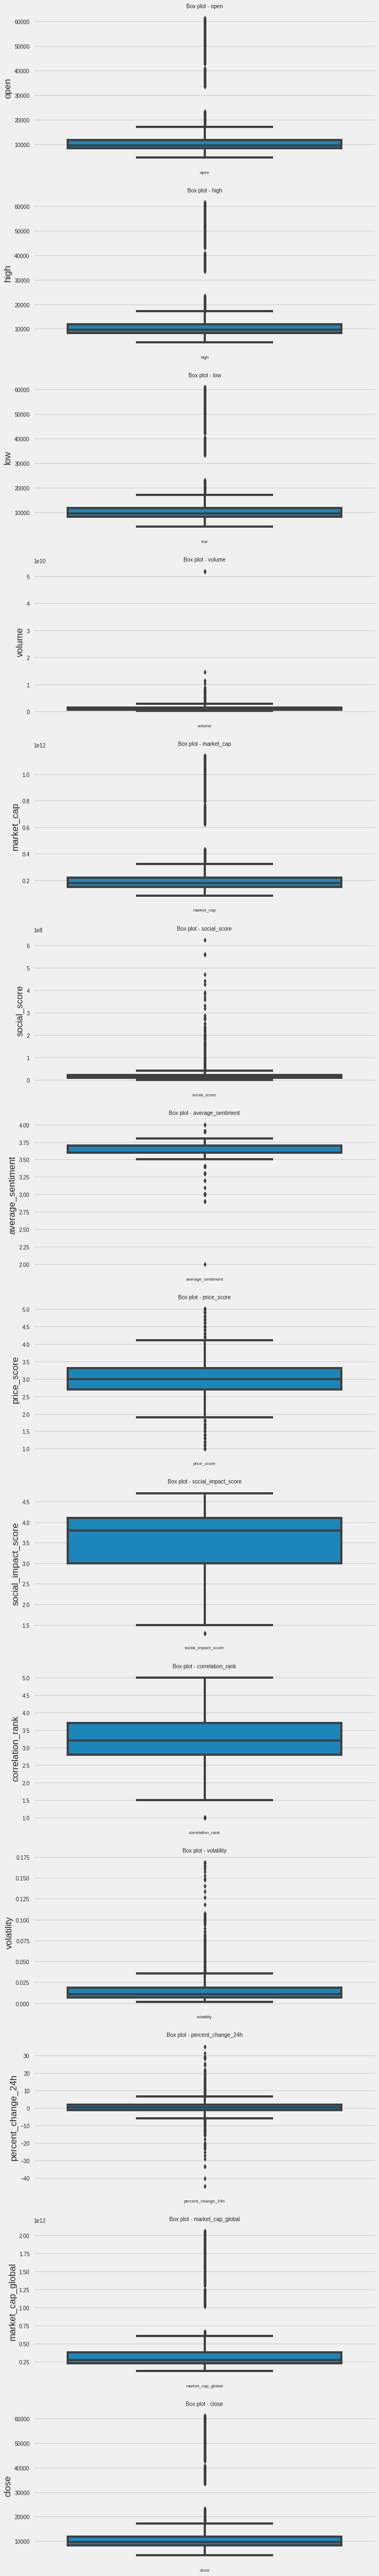

In [ ]:
# Checking for outliers in our variables

col_names = [i for i in df.describe().columns]

plt.style.use('fivethirtyeight')
plot_boxplots(df,col_names)
plt.show()

> Locating the outliers to find out what they are and what effect they have on our data

In [ ]:
# Index based search of outliers
indexes = []

def index_search(df):

  # for loop to create column interquantile ranges
  for x in df.describe().columns:
    q1 = df.describe().at['25%', x]
    q3 = df.describe().at['75%', x]
    iqr = q3 - q1

    # Upper and lower detection limits
    upper = q3 + iqr * 1.5
    lower = q1 - iqr * 1.5
    
    # looping through entries in a column
    for pos, val in enumerate(df[x]):
      if val < lower or val > upper:
        if pos not in indexes:
          indexes.append(pos)

  return len(indexes)

In [ ]:
# finding how many rows have outliers
index_search(df)

3156

## Exploratory Data Analysis

### Univariate Data Analysis

#### a) Measures of Central Tendency 

In [83]:
#finding the mean, median and mode
for i in df.describe().columns:
  print(f'for column {i}')
  print('mean:', df[i].mean())
  print('median:', df[i].median())
  print('mode:', df[i].mode())
  print('***********************************************')

for column open
mean: 15288.152232426106
median: 9579.472658
mode: 0    8962.00541
dtype: float64
***********************************************
for column high
mean: 15342.046086745704
median: 9594.687673
mode: 0    8962.00541
dtype: float64
***********************************************
for column low
mean: 15233.433473538009
median: 9556.010183
mode: 0    8947.227578
dtype: float64
***********************************************
for column volume
mean: 1276821288.3443215
median: 967679345.0
mode: 0    5.185678e+10
dtype: float64
***********************************************
for column market_cap
mean: 282352139419.5711
median: 175395212779.0
mode: 0    8.875422e+11
1    8.935197e+11
2    9.026881e+11
3    9.093261e+11
4    9.099567e+11
5    9.111170e+11
6    9.133164e+11
7    9.155700e+11
8    9.207742e+11
9    9.214360e+11
dtype: float64
***********************************************
for column social_score
mean: 22209912.64883692
median: 13877658.0
mode: 0      12430850.0
1  

#### b) Measures of Dispersion

In [ ]:
#Finding the measures of dispersion
for i in df.describe().columns:
  print(f'for column {i}')
  print('std: ', df[i].std())
  print('var: ', df[i].var())
  print('skewness: ', df[i].skew())
  print('kurtosis: ', df[i].kurt())
  print('*************************************')


for column open
std:  14228.956256137835
var:  202463196.13908404
skewness:  2.166014580374761
kurtosis:  3.157917977846997
*************************************
for column high
std:  14316.407368177652
var:  204959519.93161136
skewness:  2.165082117187322
kurtosis:  3.1465999216542886
*************************************
for column low
std:  14143.407088065167
var:  200035964.058732
skewness:  2.1662916011872606
kurtosis:  3.165197949524688
*************************************
for column volume
std:  1459909186.8871272
var:  2.131334833957433e+18
skewness:  21.346636977485424
kurtosis:  717.484052834753
*************************************
for column market_cap
std:  266407831097.01816
var:  7.097313246981735e+22
skewness:  2.1625511634056624
kurtosis:  3.1432929174573014
*************************************
for column social_score
std:  29741187.088885613
var:  884538209456096.4
skewness:  6.90299940843771
kurtosis:  84.21998508440984
*************************************
for col

#### Plotting histograms

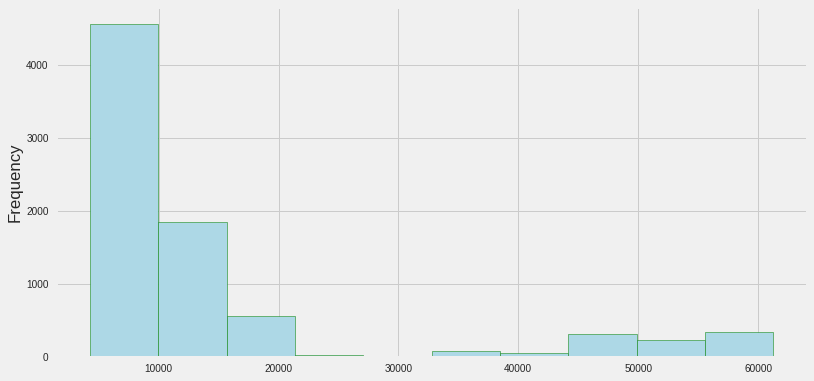

In [ ]:
# Histogram of close column 
df.close.plot(kind='hist', facecolor='lightblue', edgecolor='green',
              figsize=(12,6))


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


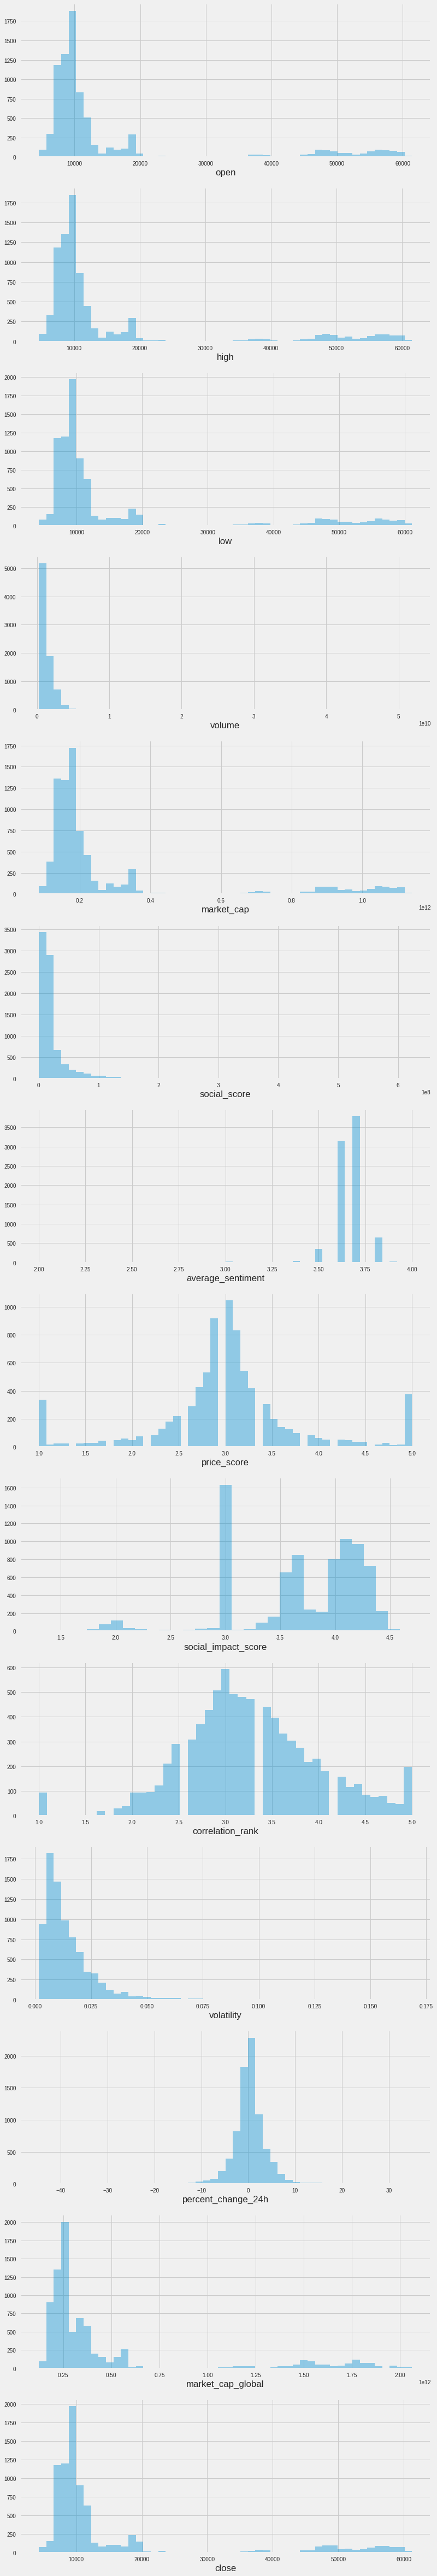

In [85]:
# plotting the histograms of numerical variables

fig, ax = plt.subplots(len(df.describe().columns), figsize=(12,80))
for x, col in enumerate(df.describe().columns):
  sns.distplot(df[col], ax=ax[x], kde=False)
  # ax[x].set_title('{}'.format(col), fontsize=10)
  # ax[x].set_xlabel(col, fontsize=8)

plt.show()



### Bivariate Data Analysis

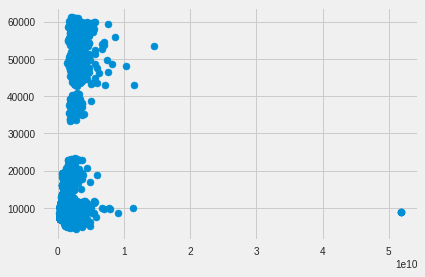

In [60]:
# scatter plot of volume vs close
plt.scatter(df['volume'], df['close'])


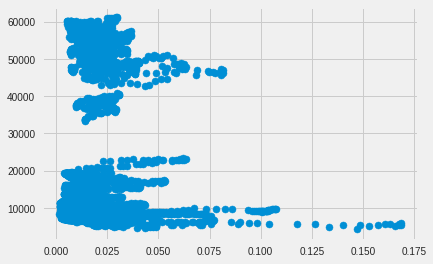

In [86]:
# scatter plot of volatility vs close
plt.scatter(df['volatility'], df['close'])
plt.show()


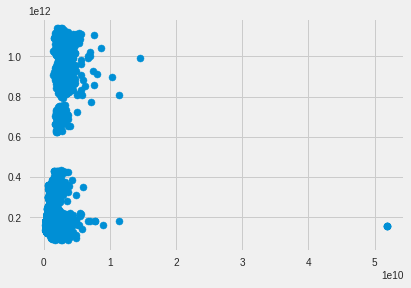

In [87]:
# scatter plot of volume vs market cap
plt.scatter(df['volume'], df['market_cap'])
plt.show()

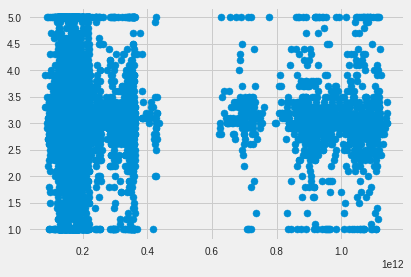

In [88]:
# scatter plot of market cap vs price score
plt.scatter(df['market_cap'], df['price_score'])
plt.show()


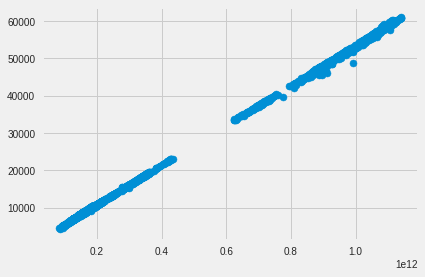

In [89]:
# scatter plot of market cap vs low
plt.scatter(df['market_cap'], df['low'])
plt.show()


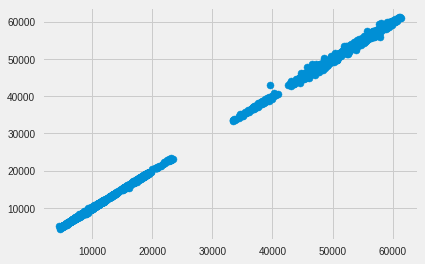

In [90]:
# scatter plot of open vs close
plt.scatter(df['open'], df['close'])
plt.show()


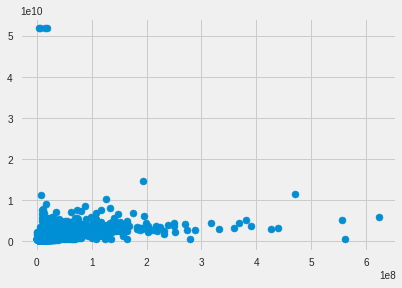

In [91]:
# scatter plot of social score vs volume
plt.scatter(df['social_score'], df['volume'])
plt.show()


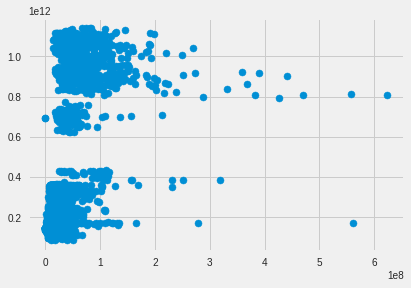

In [92]:
# scatter plot of social score vs market cap
plt.scatter(df['social_score'], df['market_cap'])
plt.show()


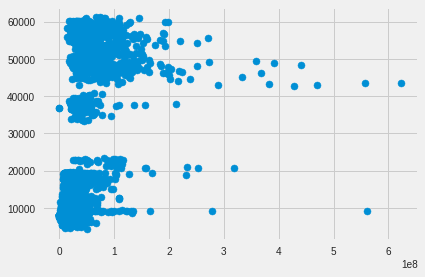

In [93]:
# scatter plot of social score vs close
plt.scatter(df['social_score'], df['close'])
plt.show()


<Figure size 7200x7200 with 0 Axes>

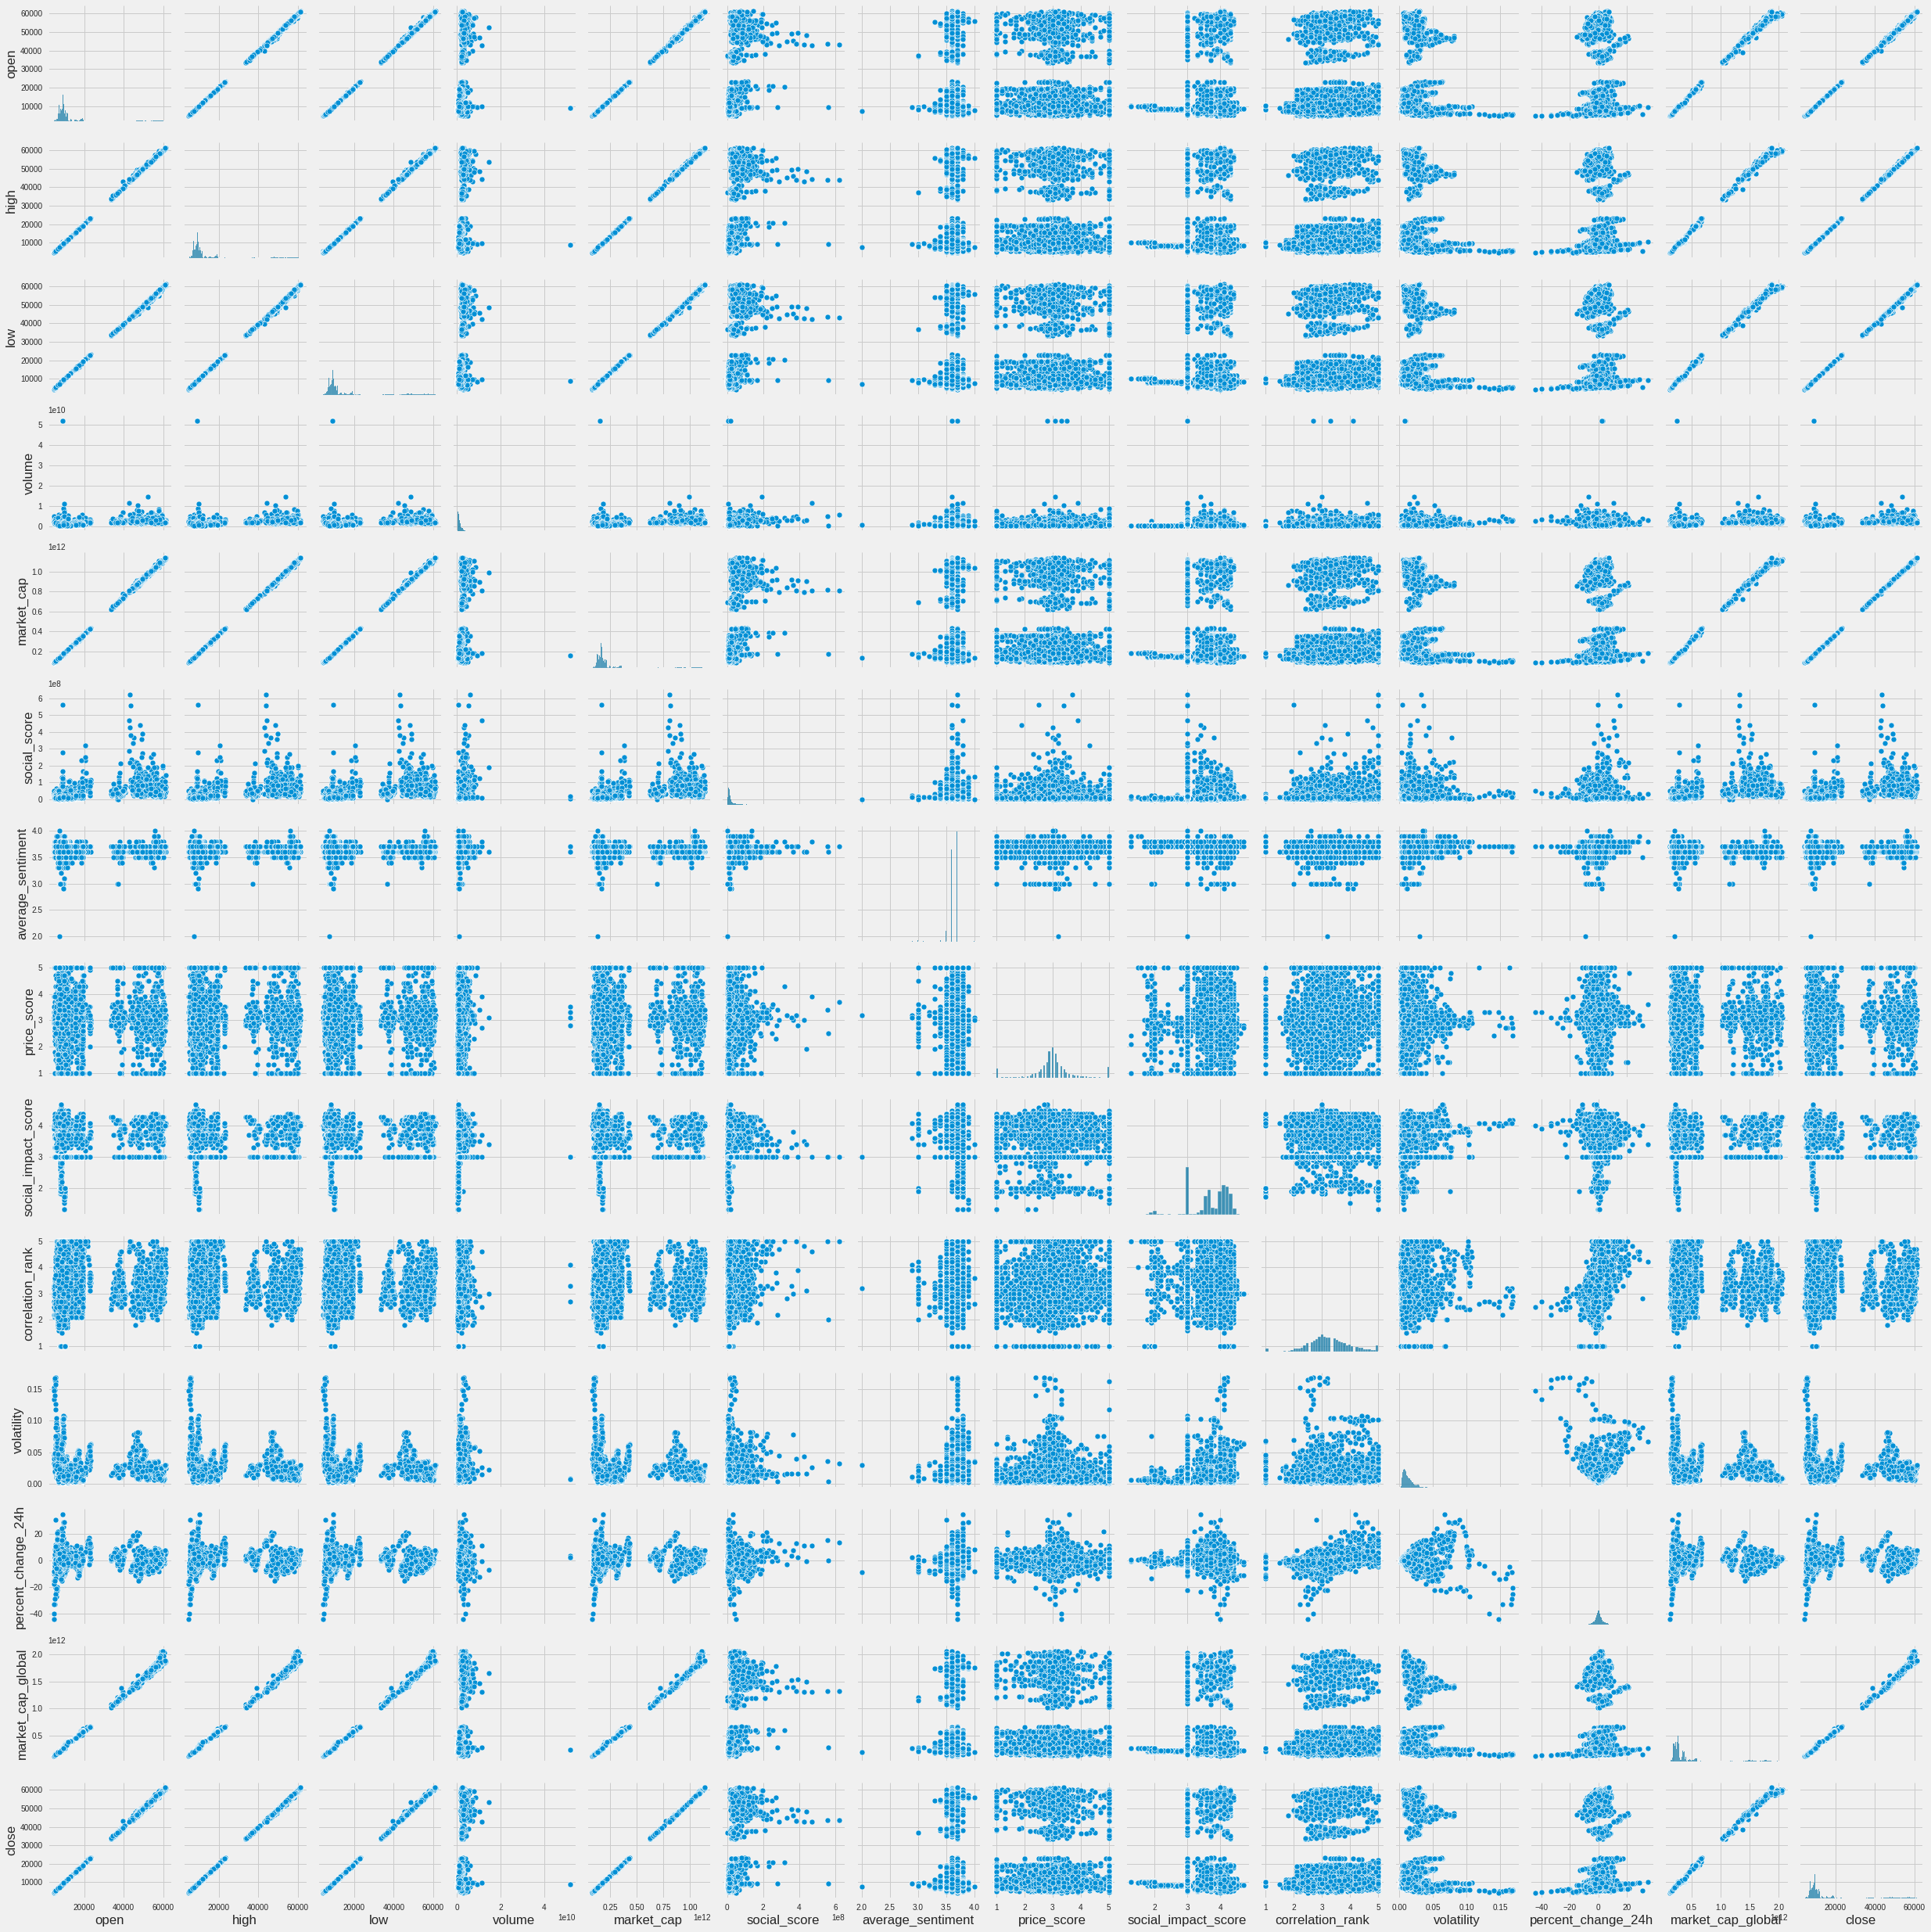

In [94]:
plt.figure(figsize=(100,100))
sns.pairplot(df)
plt.show()

In [66]:
correlations = df.corr()
correlations


,open,high,low,volume,market_cap,social_score,average_sentiment,price_score,social_impact_score,correlation_rank,volatility,percent_change_24h,market_cap_global,close
open,1.000000,0.999964,0.999960,0.401064,0.999934,0.592828,-0.098284,0.016381,-0.048065,0.045702,0.135597,0.089190,0.998854,0.999937
high,0.999964,1.000000,0.999932,0.402449,0.999959,0.594220,-0.098237,0.016685,-0.048117,0.045791,0.137195,0.089405,0.998799,0.999971
low,0.999960,0.999932,1.000000,0.399448,0.999948,0.591725,-0.098178,0.016238,-0.048125,0.045638,0.134257,0.090383,0.998949,0.999956
volume,0.401064,0.402449,0.399448,1.000000,0.401412,0.355317,-0.041462,0.054764,0.006329,0.056297,0.218396,0.057423,0.399012,0.401298
market_cap,0.999934,0.999959,0.999948,0.401412,1.000000,0.593575,-0.099556,0.016799,-0.046886,0.045779,0.135929,0.089915,0.998974,0.999978
social_score,0.592828,0.594220,0.591725,0.355317,0.593575,1.000000,-0.056144,0.034982,-0.017990,0.117302,0.220392,0.141118,0.584767,0.593177
average_sentiment,-0.098284,-0.098237,-0.098178,-0.041462,-0.099556,-0.056144,1.000000,-0.009997,-0.092715,0.034616,0.039798,0.099483,-0.105877,-0.098324
price_score,0.016381,0.016685,0.016238,0.054764,0.016799,0.034982,-0.009997,1.000000,0.025557,0.051479,0.000818,0.031983,0.017598,0.016518
social_impact_score,-0.048065,-0.048117,-0.048125,0.006329,-0.046886,-0.017990,-0.092715,0.025557,1.000000,-0.001844,0.102233,0.030391,-0.043054,-0.048145
correlation_rank,0.045702,0.045791,0.045638,0.056297,0.045779,0.117302,0.034616,0.051479,-0.001844,1.000000,0.093078,0.449280,0.044291,0.045641


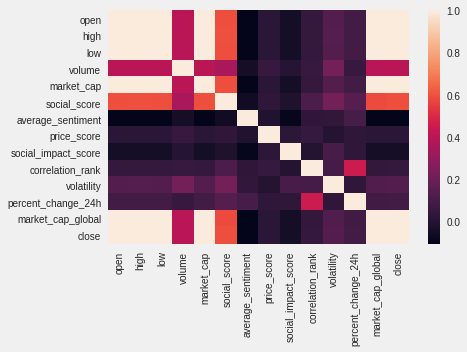

In [69]:
sns.heatmap(correlations)

In [ ]:
df.dtypes

id                      object
open                   float64
high                   float64
low                    float64
volume                 float64
market_cap             float64
social_score           float64
average_sentiment      float64
price_score            float64
social_impact_score    float64
correlation_rank       float64
volatility             float64
percent_change_24h     float64
market_cap_global      float64
close                  float64
dtype: object

## Implementing the solution

In [ ]:
# Transforming variables to logarithmic scales

for x in df.describe().columns:
  if x == 'percent_change_24h':
    df[x] = np.log(df[x].apply(lambda i : i + 50))
  else:  
    df[x] = np.log(df[x])


index_search(df)

## Challenging the solution

## Follow up questions